## Text Classification: Bag-of-words Model

### Libraries

In [1]:

import os
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import nltk

### Tweet Data

In [4]:
tweets = pd.read_csv("tweets.csv")

In [5]:
tweets.head()

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8


In [6]:
tweets=tweets.loc[tweets.Avg!=0]#Removing 0,since it forms most of values

In [7]:
tweets=tweets.reset_index()

In [8]:
len(tweets.loc[tweets.Avg==0])#Checking if there are 0s

0

### Test Pre-processing

#### 1. Converting the text into lower cases

In [9]:
#Convert a string into lower case
twt = tweets.Tweet[1]
twt.lower()

'ios 7 is so fricking smooth & beautiful!! #thanxapple @apple'

In [10]:
#normalizing all the tweets
tweet=tweets['Tweet'].str.lower()

In [11]:
tweet

0      i have to say, apple has by far the best custo...
1      ios 7 is so fricking smooth & beautiful!! #tha...
2                                          love u @apple
3      thank you @apple, loving my new iphone 5s!!!!!...
4      .@apple has the best customer service. in and ...
                             ...                        
839                                         freak @apple
840    why cant i freaking see pictures on my tl im a...
841                   @apple you freaking cows freak you
842    @apple i hate you why is my phone not working ...
843    @agounalakis that's nasty! @apple is a nasty brat
Name: Tweet, Length: 844, dtype: object

#### 2. Remove Punctuations/special symbols and 

In [12]:
#Removing punctuation from a single tweet
import string
p = string.punctuation
remv_punc = str.maketrans("", "", p)
twt.translate(remv_punc)

'iOS 7 is so fricking smooth  beautiful ThanxApple Apple'

In [13]:
p

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
#Removing punctuation from all the tweets
tweet=tweet.str.translate(remv_punc)
tweet

0      i have to say apple has by far the best custom...
1      ios 7 is so fricking smooth  beautiful thanxap...
2                                           love u apple
3      thank you apple loving my new iphone 5s  apple...
4      apple has the best customer service in and out...
                             ...                        
839                                          freak apple
840    why cant i freaking see pictures on my tl im a...
841                    apple you freaking cows freak you
842    apple i hate you why is my phone not working i...
843        agounalakis thats nasty apple is a nasty brat
Name: Tweet, Length: 844, dtype: object

#### 3. Remove stopwords (and the word "apple")

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
#NLTK stopword list
stop_words = stopwords.words("english")
len(stop_words)

179

In [17]:
#Adding the word apple to the list of stopwords
stop_words.append("apple")
len(stop_words)

180

In [18]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
#Remove stop words from a single tweet
" ".join([w for w in tweets.Tweet[0].split() if w not in stop_words])

'I say, Apple far best customer care service I ever received! @Apple @AppStore'

In [20]:
#Removing stopwords from all the tweets
tweet=tweet.apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
tweet

0      say far best customer care service ever receiv...
1             ios 7 fricking smooth beautiful thanxapple
2                                                 love u
3      thank loving new iphone 5s iphone5s pictwitter...
4                  best customer service new phone 10min
                             ...                        
839                                                freak
840    cant freaking see pictures tl im annoyed freak...
841                                  freaking cows freak
842                    hate phone working im going freak
843                   agounalakis thats nasty nasty brat
Name: Tweet, Length: 844, dtype: object

#### 4. Remove white spaces

In [21]:
for i in range(len(tweets.Tweet)):
    tweets.Tweet[i] = tweets.Tweet[i].replace("  ", " ").strip()
tweets.Tweet

0      I have to say, Apple has by far the best custo...
1      iOS 7 is so fricking smooth & beautiful!! #Tha...
2                                          LOVE U @APPLE
3      Thank you @apple, loving my new iPhone 5S!!!!!...
4      .@apple has the best customer service. In and ...
                             ...                        
839                                         freak @apple
840    WHY CANT I freakING SEE PICTURES ON MY TL IM A...
841                   @APPLE YOU freakING COWS freak YOU
842    @apple I hate you why is my phone not working ...
843    @aGounalakis that's nasty! @apple is a nasty brat
Name: Tweet, Length: 844, dtype: object

In [22]:
tweet=tweet.str.replace('  ',' ')

In [23]:
tweet

0      say far best customer care service ever receiv...
1             ios 7 fricking smooth beautiful thanxapple
2                                                 love u
3      thank loving new iphone 5s iphone5s pictwitter...
4                  best customer service new phone 10min
                             ...                        
839                                                freak
840    cant freaking see pictures tl im annoyed freak...
841                                  freaking cows freak
842                    hate phone working im going freak
843                   agounalakis thats nasty nasty brat
Name: Tweet, Length: 844, dtype: object

#### 5. Stemming

In [24]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps

<PorterStemmer>

In [25]:
#Stemming example
sentence = "argue argues argued arguing "

for word in sentence.split():
    print(ps.stem(word))

argu
argu
argu
argu


In [26]:
" ".join([ps.stem(w) for w in sentence.split()])

'argu argu argu argu'

In [27]:
#Remove stopwords from all the tweets
tweet1=tweet.apply(lambda x: ' '.join([ps.stem(w) for w in x.split()]))

In [28]:
tweet1

0      say far best custom care servic ever receiv ap...
1                     io 7 frick smooth beauti thanxappl
2                                                 love u
3      thank love new iphon 5s iphone5 pictwittercomx...
4                     best custom servic new phone 10min
                             ...                        
839                                                freak
840      cant freak see pictur tl im annoy freak twitter
841                                      freak cow freak
842                          hate phone work im go freak
843                     agounalaki that nasti nasti brat
Name: Tweet, Length: 844, dtype: object

### Document-Term Matrix

#### 1. Get the Bag-Of-Words (BOW) Dataframe

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
#using count vectoroizer to create a document-term matrix
cv=CountVectorizer()
x=np.array(cv.fit_transform(tweet1).toarray())#np.array is redundant here,toarray is sufficient


In [31]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
#The word list
names=cv.get_feature_names()

In [33]:
names

['075',
 '10',
 '100',
 '1085',
 '10min',
 '110',
 '12',
 '13',
 '13appl',
 '16',
 '16gb',
 '17',
 '180',
 '18th',
 '199',
 '1am',
 '1jazzyjeff',
 '1st',
 '1u',
 '20',
 '200',
 '2000ad',
 '2001',
 '2002',
 '2005',
 '2011with',
 '2013',
 '20th',
 '22',
 '22nd',
 '24',
 '2nd',
 '2shaneez',
 '30',
 '300',
 '30min',
 '34',
 '350',
 '3d',
 '3g',
 '3x',
 '3yr',
 '40000',
 '40k',
 '40mb',
 '4s',
 '50',
 '500',
 '528',
 '53',
 '549',
 '55c',
 '55mb',
 '5c',
 '5cheap',
 '5s',
 '5s5c',
 '5sc',
 '5th',
 '600',
 '6000',
 '64',
 '64bit',
 '65min',
 '6monthlifespan',
 '719',
 '73',
 '740',
 '7evenstarz',
 '7pm',
 '7s',
 '7wow',
 '86',
 '899',
 '8bitsound',
 '95',
 '99preorder',
 'a3',
 'a7',
 'aaaaaappl',
 'aapl',
 'abrsm',
 'absolut',
 'abt',
 'acampan',
 'accept',
 'access',
 'accident',
 'accion',
 'accord',
 'accordingtonina',
 'account',
 'accur',
 'ace',
 'achiev',
 'acquir',
 'act',
 'activist',
 'actual',
 'ad',
 'adambain',
 'add',
 'addict',
 'address',
 'adjust',
 'admit',
 'adopt',
 'adp

In [34]:
#Converting the document-term matrix to a dataframe
DTM=pd.DataFrame(x,columns=names)

In [35]:
DTM

,075,10,100,1085,10min,110,12,13,13appl,16,...,yike,yldthng,yo,yooo,youd,your,youv,z10,zimmerman,zippo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2. Dimension Reduction

In [36]:
#Remove terms that is contained in less than 0.5% of the documents
DTM.apply(lambda x: np.sum(x)/len(x)**100, axis=0)

075          4.642857e-293
10           1.392857e-292
100          4.642857e-293
1085         2.321429e-293
10min        2.321429e-293
                 ...      
your         2.785714e-292
youv         2.321429e-293
z10          2.321429e-293
zimmerman    2.321429e-293
zippo        2.321429e-293
Length: 2548, dtype: float64

In [37]:
DTM1=DTM.copy()
for col in list(DTM1):
    prop=DTM1[col].sum()/DTM1.shape[0]
    if prop*100<1:
        DTM1=DTM1.drop([col],axis=1)

In [38]:
DTM1.shape

(844, 156)

### Word Cloud

In [39]:
import matplotlib.pyplot as plt
#!pip install wordcloud
from wordcloud import WordCloud

In [40]:
#Positive and negative tweets
p=""
n=""
tweets['tweet_stemmed']=tweet1
for i in range(tweets.shape[0]):
    if tweets.Avg[i]<=0:
        n=n+tweets.tweet_stemmed[i]
    else:
        p=p+tweets.tweet_stemmed[i]
        



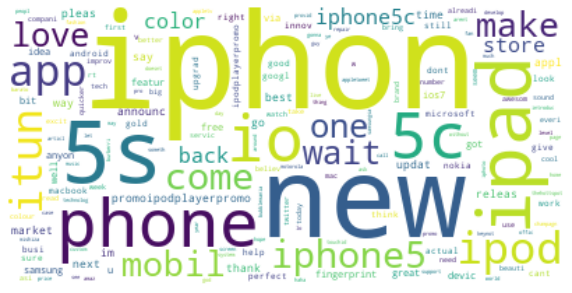

In [41]:
#Wordcloud for positive tweets
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(p)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

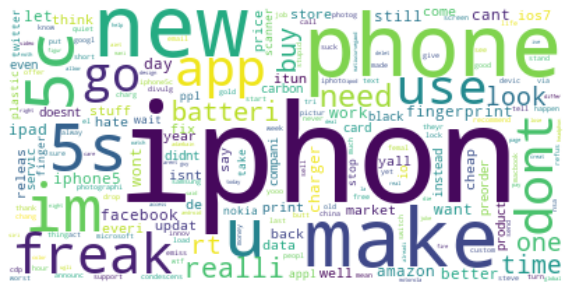

In [42]:
#Wordcloud for negative tweets
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(n)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Classification Model

#### 1. Train-Validation-Test Split

In [43]:
y = tweets.Avg <= 0
y

0      False
1      False
2      False
3      False
4      False
       ...  
839     True
840     True
841     True
842     True
843     True
Name: Avg, Length: 844, dtype: bool

In [44]:
#For test-train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(DTM1, y, test_size = 0.2,stratify=y)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size = 0.2,stratify=y_test)


In [45]:
len(y.loc[y==True])

541

Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [47]:
dt=DecisionTreeClassifier(max_depth=6)

In [48]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

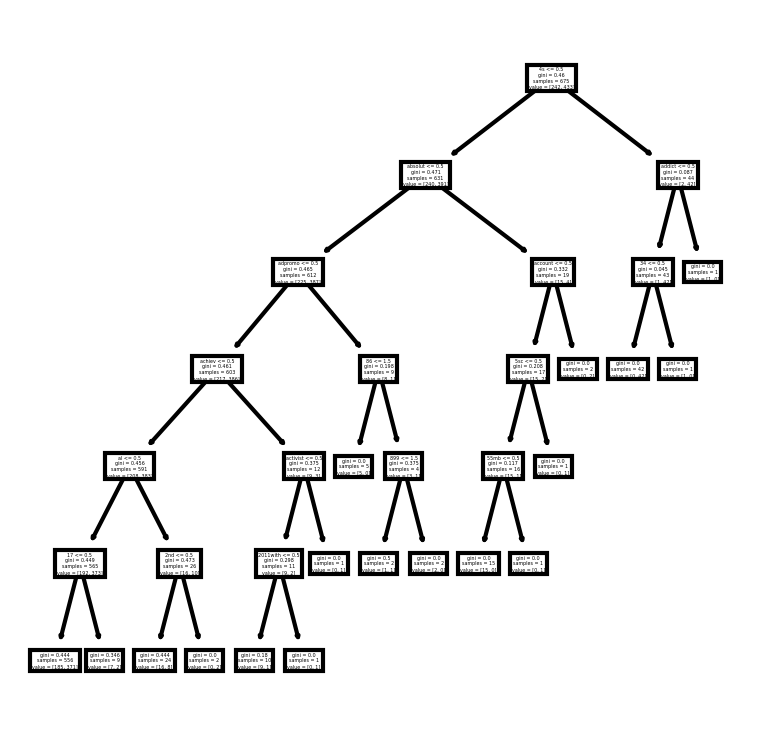

In [49]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(figsize=(3,3),dpi=300)
tree.plot_tree(dt,feature_names=list(names),filled=False)
plt.show()

In [50]:
path=DecisionTreeClassifier()
ccp_alphas=path.cost_complexity_pruning_path(x_train, y_train)

In [51]:
ccp=ccp_alphas['ccp_alphas']

In [52]:
from sklearn.metrics import *
acc_train=[]
acc_test=[]
for i in ccp:
    dt1=DecisionTreeClassifier(ccp_alpha=i,max_depth=6)
    dt1.fit(x_train,y_train)
    y_train_pred=dt1.predict(x_train)
    y_test_pred=dt1.predict(x_test)
    acc_train.append(accuracy_score(y_train,y_train_pred))
    acc_test.append(accuracy_score(y_test,y_test_pred))
list(ccp)[acc_test.index(max(acc_test))]

0.0

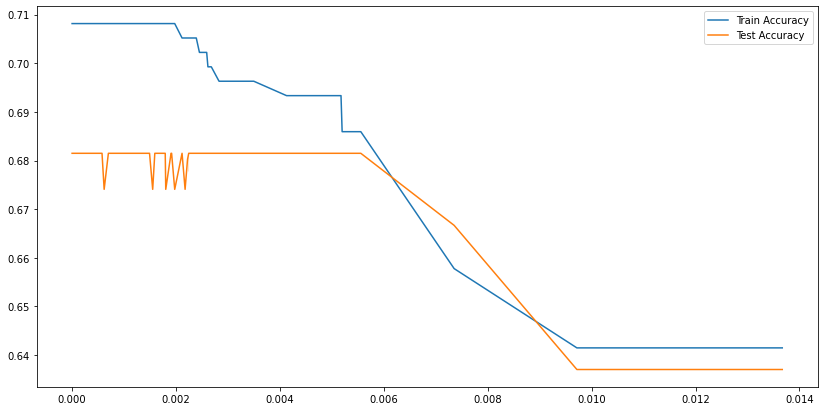

In [53]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.lineplot(y=acc_train,x=ccp,label='Train Accuracy')
sns.lineplot(y=acc_test,x=ccp,label='Test Accuracy')
plt.show()

In [54]:
#Train acc is highest at alpha equal to 0.06
dtp=DecisionTreeClassifier(ccp_alpha=list(ccp)[acc_test.index(max(acc_test))])

In [55]:
dtp.fit(x_train,y_train)

DecisionTreeClassifier()

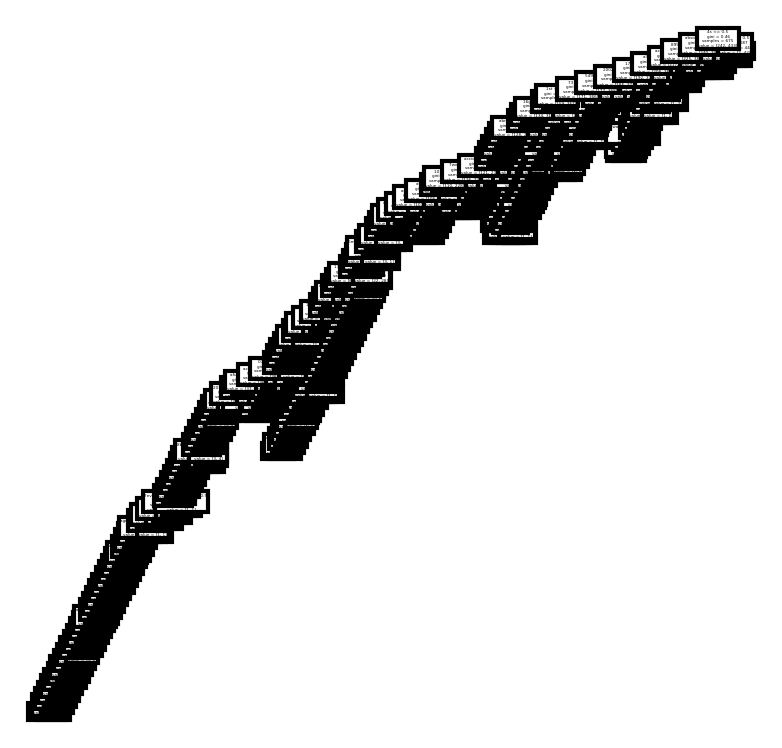

In [56]:
fig,axes=plt.subplots(figsize=(3,3),dpi=300)
tree.plot_tree(dtp,feature_names=list(names),filled=False)
plt.show()

In [57]:
dtp.score(x_train,y_train)

0.9466666666666667

In [58]:
dtp.score(x_test,y_test)

0.5851851851851851

In [59]:
dt.score(x_test,y_test)

0.6814814814814815

In [60]:
dt.score(x_train,y_train)

0.7081481481481482

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf=RandomForestClassifier(max_depth=6)

In [63]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6)

In [64]:
rf.score(x_train,y_train)

0.682962962962963

In [65]:
rf.score(x_test,y_test)

0.6666666666666666

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6))

In [67]:
ab.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6))

In [68]:
ab.score(x_train,y_train)

0.9466666666666667

In [69]:
ab.score(x_test,y_test)

0.674074074074074

In [70]:
from sklearn.ensemble import BaggingClassifier

In [71]:
b=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6))


In [72]:
b.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6))

In [73]:
b.score(x_train,y_train)

0.7125925925925926

In [74]:
b.score(x_test,y_test)

0.6518518518518519

In [75]:
#Combining adaboost and bagging
b1=BaggingClassifier(base_estimator=ab)

In [76]:
b1.fit(x_train,y_train)

BaggingClassifier(base_estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6)))

In [77]:
b1.score(x_train,y_train)

0.9348148148148148

In [78]:
b1.score(x_test,y_test)

0.6814814814814815

In [79]:
a1=AdaBoostClassifier(base_estimator=b)

In [80]:
a1.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6)))

In [81]:
a1.score(x_train,y_train)

0.9466666666666667

In [82]:
a1.score(x_test,y_test)

0.6666666666666666

In [ ]:
#DTP Performance is worst, RF the best